In [4]:
import numpy as np
import math
from scipy.misc import derivative as deriv
#import matplotlib.pyplot as plt

In [22]:
class Polinom:
    def __init__(self, vect):
        self.coef = vect
    
    def value_pol(self, x):
        polinom = 0
        for i in range(0, len(self.coef)):
            polinom += self.coef[i] * pow(x,i)
        return polinom
        
    #works(don't forget to change in lab1-5.py!!!)
    def Bisection(self, left, right, eps):
        number_iter = 0
        x_mean = (left + right) / 2
        interval_result = []

        while not((math.fabs(left - right) < eps) and (math.fabs(self.value_pol(x_mean) < eps))):
            x_mean = (left + right) / 2
            interval_result.append(left)
            interval_result.append(right)
            interval_result.append(self.value_pol(left))
            interval_result.append(self.value_pol(right))

            if (self.value_pol(left) * self.value_pol(x_mean) < 0):
                left = left
                right = x_mean
            else:
                left = x_mean
                right = right
            number_iter += 1
            
        return [x_mean,number_iter], interval_result
        
    
    def derivative(self, x):
        derivative = 0
        for i in range(1, len(self.coef)):
            derivative += self.coef[i] * i * pow(x, i-1)
        return derivative
    
    #works(don't forget to change in lab1-5.py!!!)
    def newton(self, left, right, eps):
        x0 = (left + right) / 2
        x1 = x0 - (self.value_pol(x0) / self.derivative(x0))
        number_iter = 0
        inter_result = []
        while not(math.fabs(self.value_pol(x1)) < eps and math.fabs(x1 - x0) < eps):
            inter_result.append(x1)
            inter_result.append(self.value_pol(x1))
            x0 = x1
            x1 = x0 - (self.value_pol(x0) / self.derivative(x0))
            number_iter += 1
        return [x1, number_iter], inter_result
            
    def chords_method(self, left, right, eps):
        val = left
        val1 = right
        x0 = val
        x1 = val1
        number_iter = 0
        inter_result = []
        while not(math.fabs(x1 - x0) < eps and math.fabs(self.value_pol(x1)) < eps):
            inter_result.append(x0)
            inter_result.append(x1)
            inter_result.append(self.value_pol(x0)) 
            inter_result.append(self.value_pol(x1))
            x0 = x1
            x1 = (val * self.value_pol(val1) - val1 * self.value_pol(val)) / (self.value_pol(val1) - self.value_pol(val))
            if (self.value_pol(val) * self.value_pol(x1) > 0):
                val = x1
            else:
                val1 = x1
            number_iter += 1
        return [x1, number_iter], inter_result

if __name__ == 'main':
    pol = Polinom([3,0,0,-1,-3,2])
    
    f = open("Result.txt", 'w')
    f.write("Main Results: ", '\n')
    f.write('Bisection: ', x_mean, number_iter)


In [23]:
pol = Polinom([3,0,0,-1,-3,2])
pol.coef

[3, 0, 0, -1, -3, 2]

In [24]:
print(pol.Bisection(1, 1.5, 1e-5))

([1.2064933776855469, 17], [1, 1.5, 1, -0.375, 1, 1.25, 1, -0.173828125, 1.125, 1.25, 0.37481689453125, -0.173828125, 1.1875, 1.25, 0.08260154724121094, -0.173828125, 1.1875, 1.21875, 0.08260154724121094, -0.051298677921295166, 1.203125, 1.21875, 0.014389628544449806, -0.051298677921295166, 1.203125, 1.2109375, 0.014389628544449806, -0.01878940808819607, 1.203125, 1.20703125, 0.014389628544449806, -0.002281150014823652, 1.205078125, 1.20703125, 0.006034229002182201, -0.002281150014823652, 1.2060546875, 1.20703125, 0.0018714989519192926, -0.002281150014823652, 1.2060546875, 1.20654296875, 0.0018714989519192926, -0.00020609042471519956, 1.206298828125, 1.20654296875, 0.0008323886354970611, -0.00020609042471519956, 1.2064208984375, 1.20654296875, 0.0003130701239948408, -0.00020609042471519956, 1.20648193359375, 1.20654296875, 5.3470094990792916e-05, -0.00020609042471519956, 1.20648193359375, 1.206512451171875, 5.3470094990792916e-05, -7.631510468630864e-05, 1.20648193359375, 1.20649719238

In [25]:
list(pol.Bisection(1,1.5,1e-5))[0][0]

1.2064933776855469

In [11]:
f = open('res.txt', 'w')
f.write(str(list(pol.Bisection(1,1.5,1e-5))[0][0]))
f.close()

In [26]:
print(pol.Bisection(1.5,2,1e-5))

([1.5727558135986328, 18], [1.5, 2, -0.375, 11, 1.5, 1.75, -0.375, 2.330078125, 1.5, 1.625, -0.375, 0.45220947265625, 1.5625, 1.625, -0.06963920593261719, 0.45220947265625, 1.5625, 1.59375, -0.06963920593261719, 0.1615249514579773, 1.5625, 1.578125, -0.06963920593261719, 0.038851598277688026, 1.5703125, 1.578125, -0.017124032077845186, 0.038851598277688026, 1.5703125, 1.57421875, -0.017124032077845186, 0.010425946797113284, 1.572265625, 1.57421875, -0.0034578390356614364, 0.010425946797113284, 1.572265625, 1.5732421875, -0.0034578390356614364, 0.0034567721206073543, 1.57275390625, 1.5732421875, -7.343554045746714e-06, 0.0034567721206073543, 1.57275390625, 1.572998046875, -7.343554045746714e-06, 0.0017230104668897184, 1.57275390625, 1.5728759765625, -7.343554045746714e-06, 0.0008574076639007444, 1.57275390625, 1.57281494140625, -7.343554045746714e-06, 0.00042492562698726033, 1.57275390625, 1.572784423828125, -7.343554045746714e-06, 0.00020876443201345296, 1.57275390625, 1.57276916503906

In [27]:
print(pol.Bisection(-1.5, -0.75, 1e-5))

([-0.9413537979125977, 18], [-1.5, -0.75, -24.0, 1.998046875, -1.125, -0.75, -3.98565673828125, 1.998046875, -1.125, -0.9375, -3.98565673828125, 0.05815315246582031, -1.03125, -0.9375, -1.628888189792633, 0.05815315246582031, -0.984375, -0.9375, -0.7115524392575026, 0.05815315246582031, -0.9609375, -0.9375, -0.30940060381544754, 0.05815315246582031, -0.94921875, -0.9375, -0.12143826677311154, 0.05815315246582031, -0.943359375, -0.9375, -0.030613294385318568, 0.05815315246582031, -0.943359375, -0.9404296875, -0.030613294385318568, 0.014025126268416344, -0.94189453125, -0.9404296875, -0.00823002080153623, 0.014025126268416344, -0.94189453125, -0.941162109375, -0.00823002080153623, 0.0029135355003717667, -0.9415283203125, -0.941162109375, -0.0026542428312872346, 0.0029135355003717667, -0.9415283203125, -0.94134521484375, -0.0026542428312872346, 0.0001306457732117572, -0.941436767578125, -0.94134521484375, -0.00126154860486416, 0.0001306457732117572, -0.9413909912109375, -0.94134521484375,

In [7]:
pol.bisection(1, 1.5, 1e-5)

(1.2064952850341797, 17)

In [8]:
pol.bisection(1.5, 2, 1e-5)

(1.572998046875, 10)

In [16]:
pol.newton(-1.5, -0.75, 1e-5)

([-0.9413538076980524, 4],
 [-0.9890038486529715,
  -0.7952641335010637,
  -0.9454072964073716,
  -0.062121961464129294,
  -0.9413857579754438,
  -0.0004858106942700058,
  -0.9413538096993872,
  -3.042881080439486e-08])

In [186]:
pol.newton(1,1.5,1e-5)

(1.2064945062236794,
 3,
 [1.2031578947368422,
  0.014248578006013979,
  1.2064809717603988,
  5.75607418067392e-05,
  1.2064945059952719,
  9.713785331655345e-10])

In [169]:
pol.newton(-1.5,-0.75,1e-5)

(-0.9413538076980524, 5)

In [11]:
pol.newton(1,1.5,1e-5)

(1.2064945062236794, 4)

In [12]:
pol.newton(1.5,2,1e-5)

(1.572754943393507, 5)

In [28]:
print(pol.chords_method(1, 1.5, 1e-5))

([1.2064958160150578, 7], [1, 1.5, 1, -0.375, 1.5, 1.3636363636363635, -0.375, -0.4787117124389173, 1.3636363636363635, 1.2459143053899255, -0.4787117124389173, -0.15854742487296392, 1.2459143053899255, 1.2122608881694164, -0.15854742487296392, -0.02434447437795928, 1.2122608881694164, 1.2072163158768572, -0.02434447437795928, -0.003066965457591664, 1.2072163158768572, 1.206582733768255, -0.003066965457591664, -0.0003751754498839688, 1.206582733768255, 1.2065052580651572, -0.0003751754498839688, -4.5725140012997656e-05])


In [29]:
print(pol.chords_method(-1.5, -0.75, 1e-5))

([-0.9413533067739055, 30], [-1.5, -0.75, -24.0, 1.998046875, -0.75, -0.8076402974983097, 1.998046875, 1.563133019504154, -0.8076402974983097, -0.8499766696295633, 1.563133019504154, 1.1609387632029777, -0.8499766696295633, -0.8799690832002751, 1.1609387632029777, 0.8272884704771317, -0.8799690832002751, -0.9006295926803068, 0.8272884704771317, 0.5716009809813076, -0.9006295926803068, -0.9145725471121438, 0.5716009809813076, 0.3863401407605027, -0.9145725471121438, -0.9238471706615676, 0.3863401407605027, 0.25718831890915816, -0.9238471706615676, -0.9299558661816001, 0.25718831890915816, 0.16946579722485478, -0.9299558661816001, -0.9339527680743172, 0.16946579722485478, 0.11090577594492612, -0.9339527680743172, -0.9365564822633058, 0.11090577594492612, 0.07225680039184512, -0.9365564822633058, -0.9382477497722382, 0.07225680039184512, 0.04693854852738566, -0.9382477497722382, -0.9393442650398459, 0.04693854852738566, 0.03043345118204832, -0.9393442650398459, -0.9400543100323555, 0.0304

In [13]:
pol.chords_method(-1.5, -0.75, 1e-5)

(-0.9413591114804272, 6)

In [14]:
pol.chords_method(1,1.5,1e-5)

(1.2064944272202631, 5)

In [15]:
pol.chords_method(1.5,2,1e-5)

(1.5727553855862404, 5)

In [39]:
pol1 = Polinom([-3, 0, 9/50, 28/25])
pol2 = Polinom([28975/784, -375/14, 1275/1568])
pol3 = Polinom([-36588592/21675, -25367552/21675])

In [83]:
pol2.value_pol(0.5)

23.768335459183678

In [56]:
pol.newton(1.5,2,1e-5)

([1.5727549433935073, 4],
 [1.6351559491721217,
  0.5604479191909775,
  1.5842232634143272,
  0.0850043779857188,
  1.5732514524167704,
  0.003522633960017174,
  1.5727559349223545,
  7.020689217540621e-06])

In [61]:
pol.newton(0.5,1.4,1e-5)

([1.2064945062235568, 2],
 [1.2069952973007796,
  -0.0021284475230274325,
  1.2064941922829258,
  1.3351371537240198e-06])

In [62]:
pol.chords_method(0.5,1.4,1e-5)

([1.2064945062459673, 5],
 [0.5,
  1.4,
  2.75,
  -0.5123200000000008,
  1.4,
  1.258662546899139,
  -0.5123200000000008,
  -0.20542498052810299,
  1.258662546899139,
  1.2059296100284802,
  -0.20542498052810299,
  0.0024040973263286247,
  1.2059296100284802,
  1.206539607021437,
  0.0024040973263286247,
  -0.00019179523329704296,
  1.206539607021437,
  1.2064945379313696,
  -0.00019179523329704296,
  -1.348474079065909e-07])

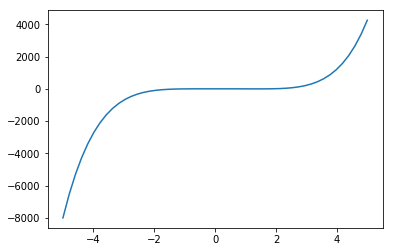

In [34]:
x = np.linspace(-5, 5, 50)
y = 2 * np.power(x, 5) - 3 * np.power(x, 4) - np.power(x, 3) + 3

plt.plot(x, y)
plt.show()

